In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [119]:
!pip install wordcloud


     |████████████████████████████████| 368kB 2.7MB/s eta 0:00:01


In [116]:
import nltk
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

In [121]:
import re
from wordcloud import WordCloud, STOPWORDS 



In [22]:
train_df= pd.read_csv("/home/rishabh/NLP/hate speech/data.1/train_E6oV3lV.csv",index_col="id")
test_df=pd.read_csv("/home/rishabh/NLP/hate speech/data.1/test_tweets_anuFYb8.csv",index_col="id",)


In [52]:
train_df.shape,test_df.shape

((31962, 3), (17197, 1))

In [111]:
train_df.head(15)

,label,tweet,tweet1
id,,,
1,0,@user when a father is dysfunctional and is s...,user father dysfunct selfish drag kid dysfunct...
2,0,@user @user thanks for #lyft credit i can't us...,user thank lyft credit use caus offer wheelcha...
3,0,bihday your majesty,bihday majesti
4,0,#model i love u take with u all the time in ...,model love u take u time ur
5,0,factsguide: society now #motivation,factsguid societi motiv
6,0,[2/2] huge fan fare and big talking before the...,2 2 huge fan fare big talk leav chao pay dispu...
7,0,@user camping tomorrow @user @user @user @use...,user camp tomorrow user user user user user us...
8,0,the next school year is the year for exams.ð...,next school year year exam think school exam h...
9,0,we won!!! love the land!!! #allin #cavs #champ...,love land allin cav champion cleveland clevela...


In [112]:
test_df.head(15)

,tweet
id,
31963,#studiolife #aislife #requires #passion #dedic...
31964,@user #white #supremacists want everyone to s...
31965,safe ways to heal your #acne!! #altwaystohe...
31966,is the hp and the cursed child book up for res...
31967,"3rd #bihday to my amazing, hilarious #nephew..."
31968,choose to be :) #momtips
31969,something inside me dies ð¦ð¿â¨ eyes nes...
31970,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...
31971,@user @user @user i will never understand why...


In [24]:
stop_words=stopwords.words("english")
stemmer = SnowballStemmer("english",ignore_stopwords=True)

In [25]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [13]:
#train_df= train_df.iloc[1900:2000,:]

TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

def preprocess(text,stem= True):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            tokens.append(stemmer.stem(token))
            

    return " ".join(tokens)

In [26]:
train_df['tweet1'] = train_df['tweet'].apply(lambda text: preprocess(text))
train_df.head(15)

,label,tweet,tweet1
id,,,
1,0,@user when a father is dysfunctional and is s...,user father dysfunct selfish drag kid dysfunct...
2,0,@user @user thanks for #lyft credit i can't us...,user thank lyft credit use caus offer wheelcha...
3,0,bihday your majesty,bihday majesti
4,0,#model i love u take with u all the time in ...,model love u take u time ur
5,0,factsguide: society now #motivation,factsguid societi motiv
6,0,[2/2] huge fan fare and big talking before the...,2 2 huge fan fare big talk leav chao pay dispu...
7,0,@user camping tomorrow @user @user @user @use...,user camp tomorrow user user user user user us...
8,0,the next school year is the year for exams.ð...,next school year year exam think school exam h...
9,0,we won!!! love the land!!! #allin #cavs #champ...,love land allin cav champion cleveland clevela...


In [51]:
documents = [tweet.split() for tweet in train_df.tweet1] 
documents

[['user', 'father', 'dysfunct', 'selfish', 'drag', 'kid', 'dysfunct', 'run'],
 ['user',
  'thank',
  'lyft',
  'credit',
  'use',
  'caus',
  'offer',
  'wheelchair',
  'van',
  'pdx',
  'disapoint',
  'getthank'],
 ['bihday', 'majesti'],
 ['model', 'love', 'u', 'take', 'u', 'time', 'ur'],
 ['factsguid', 'societi', 'motiv'],
 ['2',
  '2',
  'huge',
  'fan',
  'fare',
  'big',
  'talk',
  'leav',
  'chao',
  'pay',
  'disput',
  'get',
  'allshowandnogo'],
 ['user',
  'camp',
  'tomorrow',
  'user',
  'user',
  'user',
  'user',
  'user',
  'user',
  'user',
  'danni'],
 ['next',
  'school',
  'year',
  'year',
  'exam',
  'think',
  'school',
  'exam',
  'hate',
  'imagin',
  'actorslif',
  'revolutionschool',
  'girl'],
 ['love', 'land', 'allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'],
 ['user', 'user', 'welcom', 'gr8'],
 ['ireland',
  'consum',
  'price',
  'index',
  'mom',
  'climb',
  'previous',
  '0',
  '2',
  '0',
  '5',
  'may',
  'blog',
  'silver',
  'gold',
  'f

In [53]:
model = Word2Vec(documents)
words = model.wv.vocab
words

{'user': <gensim.models.keyedvectors.Vocab at 0x7ffb1331e250>,
 'father': <gensim.models.keyedvectors.Vocab at 0x7ffb1331e190>,
 'selfish': <gensim.models.keyedvectors.Vocab at 0x7ffb1331e0d0>,
 'drag': <gensim.models.keyedvectors.Vocab at 0x7ffb1331e1d0>,
 'kid': <gensim.models.keyedvectors.Vocab at 0x7ffb1331ee10>,
 'run': <gensim.models.keyedvectors.Vocab at 0x7ffb1331e890>,
 'thank': <gensim.models.keyedvectors.Vocab at 0x7ffb1331ef10>,
 'lyft': <gensim.models.keyedvectors.Vocab at 0x7ffb1331e110>,
 'credit': <gensim.models.keyedvectors.Vocab at 0x7ffb1331e3d0>,
 'use': <gensim.models.keyedvectors.Vocab at 0x7ffb1331e050>,
 'caus': <gensim.models.keyedvectors.Vocab at 0x7ffb1331b210>,
 'offer': <gensim.models.keyedvectors.Vocab at 0x7ffb1331bf50>,
 'van': <gensim.models.keyedvectors.Vocab at 0x7ffb1331be90>,
 'bihday': <gensim.models.keyedvectors.Vocab at 0x7ffb1331bdd0>,
 'majesti': <gensim.models.keyedvectors.Vocab at 0x7ffb1331bed0>,
 'model': <gensim.models.keyedvectors.Vocab a

In [109]:
print("vocabulary size")
len(words)

vocabulary size


5390

In [65]:
vector = model.wv['first']
vector.shape,vector

((100,),
 array([ 0.60632783,  0.934241  ,  0.5525222 , -0.35358724, -0.08600651,
         0.5511544 , -0.34202838,  0.47562686, -0.01626588,  0.9338966 ,
        -0.16220532, -0.0677576 , -0.9334861 ,  0.44903967, -0.14371817,
         0.36794794, -0.3789099 , -0.13678418,  0.08213315,  0.6270894 ,
         0.5235319 ,  0.01638738, -0.24662632,  0.9825315 , -0.5027087 ,
        -0.2744944 ,  0.10488033,  0.48442268, -0.22085744,  0.2145417 ,
         0.32010862,  0.9391258 ,  0.1739868 , -0.43158695, -0.29853204,
         0.13856742,  0.05299429, -0.17754634, -0.1799254 ,  0.29234326,
         0.63630605,  0.22078258, -0.4257065 ,  0.44517243, -0.10236448,
         0.16406663,  0.22777468,  0.08010667,  0.14641272, -0.15263173,
         0.11052021, -0.69566566, -0.6849349 , -0.01224514, -0.09919391,
        -0.96106863,  0.39588192, -0.06888515, -0.10291185,  0.22339588,
         0.0569951 , -0.49103978,  0.46895018, -0.08964469, -0.46315286,
        -1.2713022 , -0.01085516, -0.40096

In [148]:
model.wv.most_similar('girl')


[('cute', 0.9727375507354736),
 ('beauti', 0.9424383640289307),
 ('instagood', 0.9417151212692261),
 ('photooftheday', 0.9339764714241028),
 ('followm', 0.9323295950889587),
 ('summer', 0.9311118125915527),
 ('sun', 0.9308927059173584),
 ('appletstag', 0.9297992587089539),
 ('tbt', 0.9278492331504822),
 ('selfi', 0.926960289478302)]

# wordcloud


In [122]:
train_df

,label,tweet,tweet1
id,,,
1,0,@user when a father is dysfunctional and is s...,user father dysfunct selfish drag kid dysfunct...
2,0,@user @user thanks for #lyft credit i can't us...,user thank lyft credit use caus offer wheelcha...
3,0,bihday your majesty,bihday majesti
4,0,#model i love u take with u all the time in ...,model love u take u time ur
5,0,factsguide: society now #motivation,factsguid societi motiv
...,...,...,...
31958,0,ate @user isz that youuu?ðððððð...,ate user isz youuu
31959,0,to see nina turner on the airwaves trying to...,see nina turner airwav tri wrap mantl genuin h...
31960,0,listening to sad songs on a monday morning otw...,listen sad song monday morn otw work sad


In [128]:
pos=train_df[train_df['label']==1]
pos    

,label,tweet,tweet1
id,,,
14,1,@user #cnn calls #michigan middle school 'buil...,cnn call michigan middl school build wall chan...
15,1,no comment! in #australia #opkillingbay #se...,comment australia opkillingbay seashepherd hel...
18,1,retweet if you agree!,retweet agre
24,1,@user @user lumpy says i am a . prove it lumpy.,user lumpi say prove lumpi
35,1,it's unbelievable that in the 21st century we'...,unbeliev 21st centuri need someth like neverum...
...,...,...,...
31935,1,lady banned from kentucky mall. @user #jcpenn...,ladi ban kentucki mall user jcpenni kentucki
31947,1,@user omfg i'm offended! i'm a mailbox and i'...,omfg offend mailbox proud mailboxprid liberalism
31948,1,@user @user you don't have the balls to hashta...,user ball hashtag say weasel away lumpi toni d...


In [129]:
neg=train_df[train_df['label']==0]
neg

,label,tweet,tweet1
id,,,
1,0,@user when a father is dysfunctional and is s...,user father dysfunct selfish drag kid dysfunct...
2,0,@user @user thanks for #lyft credit i can't us...,user thank lyft credit use caus offer wheelcha...
3,0,bihday your majesty,bihday majesti
4,0,#model i love u take with u all the time in ...,model love u take u time ur
5,0,factsguide: society now #motivation,factsguid societi motiv
...,...,...,...
31957,0,off fishing tomorrow @user carnt wait first ti...,fish tomorrow user carnt wait first time 2 year
31958,0,ate @user isz that youuu?ðððððð...,ate user isz youuu
31959,0,to see nina turner on the airwaves trying to...,see nina turner airwav tri wrap mantl genuin h...


In [131]:
pdocuments = [ptweet.split() for ptweet in pos.tweet1] 
ndocuments = [ntweet.split() for ntweet in neg.tweet1]

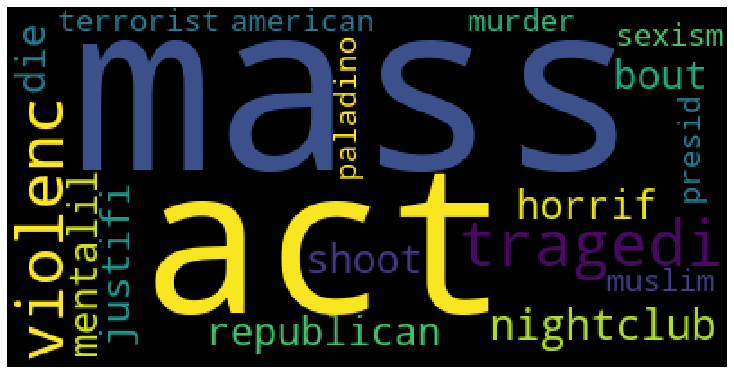

In [165]:
word="kill"


if word in words:
    str1=""
    for i in model.wv.most_similar(word,topn=20):
        str1+=" " + i[0]+ " "

    wordcloud = WordCloud().generate(str1) 
    plt.figure(figsize=(10,7)) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

else:
    print("word not in vocabulary")